# Neural Networks for Pima Indian dataset

## Import packages

In [1]:
import pandas as pd
import os
import data
from model import MLP
import tensorflow as tf
import helper
import itertools
import numpy as np
from sklearn.preprocessing import StandardScaler
seed=1

In [2]:
#TensorFlow version
print(tf.__version__)

1.5.0


## Data Processing

Retrieve imputed train and test sets 

In [2]:
currentPath = os.getcwd()
test_list = data.testImputed(currentPath=currentPath)
train = data.trainImputed(currentPath=currentPath)

Split Outcome into two columns instead of 1: Diabetic and Not_Diabetic

In [3]:
#For train
train["Not Diabetic"] = (train["Outcome"] == 0).astype(int)
train.rename(columns={"Outcome": "Diabetic"}, inplace=True)

#For test
for i in range(len(test_list)):
    test_list[i]["Not Diabetic"] = (test_list[i]["Outcome"] == 0).astype(int)
    test_list[i].rename(columns={"Outcome": "Diabetic"}, inplace=True)

Split into target and features.

In [4]:
X_train = train.as_matrix()[:,0:-2]
y_train = train.as_matrix()[:, -2:]
test_split_list = list()

#First element is X, second element is y
for i in range(len(test_list)):
    test_split_list.append( [ test_list[i].as_matrix()[:,0:-2],
                         test_list[i].as_matrix()[:,-2:] ] )


Scale the features.

In [5]:
X_test = test_split_list[0][0]
y_test = test_split_list[0][1]
scale_X = StandardScaler()
scale_X.fit(X_train)
X_train_scaled = scale_X.transform(X_train)
X_test_scaled = scale_X.transform(X_test)

## Initiate and train a Multi-layer Perceptron

In [6]:
inputDim = X_train_scaled.shape[1]
outputDim = y_train.shape[1]
mlp = MLP()
mlp.buildModel(neurons=[10,10,10,10], activations=["relu", "relu", "relu", "relu"], 
               dropout=[0.5,0.5,0.5,0.5], inputDim=inputDim, outputDim=outputDim)

In [7]:
%matplotlib inline
mlp.train(X=X_train_scaled, y=y_train, X_test=X_test_scaled, y_test=y_test, num_epochs=5000, lr=0.0001, seed=1)

Epoch 1 : Training loss: 0.70648676157, 
 test accuracy : 0.342857152224

Epoch 11 : Training loss: 0.702401518822, 
 test accuracy : 0.342857152224

Epoch 21 : Training loss: 0.70127260685, 
 test accuracy : 0.342857152224

Epoch 31 : Training loss: 0.703016161919, 
 test accuracy : 0.342857152224

Epoch 41 : Training loss: 0.69585609436, 
 test accuracy : 0.342857152224

Epoch 51 : Training loss: 0.695337116718, 
 test accuracy : 0.657142877579

Epoch 61 : Training loss: 0.685764968395, 
 test accuracy : 0.657142877579

Epoch 71 : Training loss: 0.682702302933, 
 test accuracy : 0.657142877579

Epoch 81 : Training loss: 0.686173856258, 
 test accuracy : 0.657142877579

Epoch 91 : Training loss: 0.68150472641, 
 test accuracy : 0.657142877579

Epoch 101 : Training loss: 0.672257125378, 
 test accuracy : 0.657142877579

Epoch 111 : Training loss: 0.668359220028, 
 test accuracy : 0.657142877579

Epoch 121 : Training loss: 0.652190566063, 
 test accuracy : 0.657142877579

Epoch 131 : Tr

KeyboardInterrupt: 

## Cross validation to choose parameters

In [9]:
import helper
import model
reload(helper)
reload(model)

<module 'model' from 'model.pyc'>

In [55]:
neurons=[[30,20,10],
         [50,40,30,20,10],
         [30,25,20,15],
        [50,30,40],
        [30,20],
        [40,35,30,25,20,15,10],
        [20,10,5,3]]

activations=[['relu']*3,
             ['relu6']*5,
             ['relu6']*4,
             ['sigmoid']*3,
             ['elu']*2,
             ['relu6']*7,
             ['tanh']*4
            ]

dropout = [[0.8]*3,
           [0.8]*5,
           [0.8]*4,
           [0.5]*3,
           [0.7]*2,
           [0.6]*7,
           [0.9]*4
          ]

lr = [0.0001, 0.001, 0.0005, 0.0001, 0.0003]

helper.CV_pipeline(X_train_scaled, y_train, neurons, activations, dropout,
                   lr, inputDim=X_train_scaled.shape[1], outputDim=2, seed=seed)

Parameter set 1:
Cross validation set: 1
Accuracy: 0.728571428571
Cross validation set: 2
Accuracy: 0.735714285714
Cross validation set: 3
Accuracy: 0.742857142857
Cross validation set: 4
Accuracy: 0.778571428571
Cross validation set: 5
Accuracy: 0.739130434783

Parameter set 2:
Cross validation set: 1
Accuracy: 0.714285714286
Cross validation set: 2
Accuracy: 0.721428571429
Cross validation set: 3
Accuracy: 0.75
Cross validation set: 4
Accuracy: 0.785714285714
Cross validation set: 5
Accuracy: 0.688405797101

Parameter set 3:
Cross validation set: 1
Accuracy: 0.7
Cross validation set: 2
Accuracy: 0.7
Cross validation set: 3
Accuracy: 0.742857142857
Cross validation set: 4
Accuracy: 0.785714285714
Cross validation set: 5
Accuracy: 0.724637681159

Parameter set 4:
Cross validation set: 1
Accuracy: 0.735714285714
Cross validation set: 2
Accuracy: 0.728571428571
Cross validation set: 3
Accuracy: 0.75
Cross validation set: 4
Accuracy: 0.821428571429
Cross validation set: 5
Accuracy: 0.7463

## Train on Full Data Set

Epoch 1 : Training loss: 0.686136960983, 
 test accuracy : 0.657142877579

Epoch 11 : Training loss: 0.64018446207, 
 test accuracy : 0.785714268684

Epoch 21 : Training loss: 0.579932808876, 
 test accuracy : 0.771428585052

Epoch 31 : Training loss: 0.553266584873, 
 test accuracy : 0.785714268684

Epoch 41 : Training loss: 0.543897867203, 
 test accuracy : 0.814285695553

Epoch 51 : Training loss: 0.505584418774, 
 test accuracy : 0.800000011921

Epoch 61 : Training loss: 0.494587957859, 
 test accuracy : 0.800000011921

Epoch 71 : Training loss: 0.462892562151, 
 test accuracy : 0.800000011921

Epoch 81 : Training loss: 0.465350687504, 
 test accuracy : 0.800000011921

Epoch 91 : Training loss: 0.450852781534, 
 test accuracy : 0.785714268684

Epoch 101 : Training loss: 0.514164865017, 
 test accuracy : 0.785714268684

Epoch 111 : Training loss: 0.473172396421, 
 test accuracy : 0.785714268684

Epoch 121 : Training loss: 0.505977571011, 
 test accuracy : 0.785714268684

Epoch 131 :

Epoch 1091 : Training loss: 0.487567931414, 
 test accuracy : 0.771428585052

Epoch 1101 : Training loss: 0.425065308809, 
 test accuracy : 0.785714268684

Epoch 1111 : Training loss: 0.446215599775, 
 test accuracy : 0.771428585052

Epoch 1121 : Training loss: 0.478051841259, 
 test accuracy : 0.785714268684

Epoch 1131 : Training loss: 0.427397191525, 
 test accuracy : 0.771428585052

Epoch 1141 : Training loss: 0.499608248472, 
 test accuracy : 0.785714268684

Epoch 1151 : Training loss: 0.435139834881, 
 test accuracy : 0.785714268684

Epoch 1161 : Training loss: 0.441682726145, 
 test accuracy : 0.785714268684

Epoch 1171 : Training loss: 0.437714040279, 
 test accuracy : 0.785714268684

Epoch 1181 : Training loss: 0.427188307047, 
 test accuracy : 0.785714268684

Epoch 1191 : Training loss: 0.444981396198, 
 test accuracy : 0.785714268684

Epoch 1201 : Training loss: 0.417027384043, 
 test accuracy : 0.785714268684

Epoch 1211 : Training loss: 0.395704448223, 
 test accuracy : 0.

Epoch 2151 : Training loss: 0.401334971189, 
 test accuracy : 0.800000011921

Epoch 2161 : Training loss: 0.398330718279, 
 test accuracy : 0.800000011921

Epoch 2171 : Training loss: 0.40013885498, 
 test accuracy : 0.800000011921

Epoch 2181 : Training loss: 0.386755257845, 
 test accuracy : 0.814285695553

Epoch 2191 : Training loss: 0.39022603631, 
 test accuracy : 0.814285695553

Epoch 2201 : Training loss: 0.384393334389, 
 test accuracy : 0.814285695553

Epoch 2211 : Training loss: 0.409219175577, 
 test accuracy : 0.814285695553

Epoch 2221 : Training loss: 0.395634442568, 
 test accuracy : 0.800000011921

Epoch 2231 : Training loss: 0.430540204048, 
 test accuracy : 0.814285695553

Epoch 2241 : Training loss: 0.423828393221, 
 test accuracy : 0.800000011921

Epoch 2251 : Training loss: 0.414205104113, 
 test accuracy : 0.814285695553

Epoch 2261 : Training loss: 0.395410329103, 
 test accuracy : 0.814285695553

Epoch 2271 : Training loss: 0.42405205965, 
 test accuracy : 0.814

Epoch 3221 : Training loss: 0.365148663521, 
 test accuracy : 0.800000011921

Epoch 3231 : Training loss: 0.391986966133, 
 test accuracy : 0.814285695553

Epoch 3241 : Training loss: 0.365407824516, 
 test accuracy : 0.814285695553

Epoch 3251 : Training loss: 0.367229104042, 
 test accuracy : 0.800000011921

Epoch 3261 : Training loss: 0.389449983835, 
 test accuracy : 0.800000011921

Epoch 3271 : Training loss: 0.364249587059, 
 test accuracy : 0.800000011921

Epoch 3281 : Training loss: 0.407772451639, 
 test accuracy : 0.800000011921

Epoch 3291 : Training loss: 0.379577040672, 
 test accuracy : 0.800000011921

Epoch 3301 : Training loss: 0.365571975708, 
 test accuracy : 0.814285695553

Epoch 3311 : Training loss: 0.393820554018, 
 test accuracy : 0.814285695553

Epoch 3321 : Training loss: 0.387823432684, 
 test accuracy : 0.800000011921

Epoch 3331 : Training loss: 0.407951712608, 
 test accuracy : 0.814285695553

Epoch 3341 : Training loss: 0.427792102098, 
 test accuracy : 0.

Epoch 4281 : Training loss: 0.432290762663, 
 test accuracy : 0.814285695553

Epoch 4291 : Training loss: 0.384389996529, 
 test accuracy : 0.800000011921

Epoch 4301 : Training loss: 0.376340955496, 
 test accuracy : 0.814285695553

Epoch 4311 : Training loss: 0.379217416048, 
 test accuracy : 0.800000011921

Epoch 4321 : Training loss: 0.316934347153, 
 test accuracy : 0.800000011921

Epoch 4331 : Training loss: 0.3817730546, 
 test accuracy : 0.785714268684

Epoch 4341 : Training loss: 0.361242204905, 
 test accuracy : 0.800000011921

Epoch 4351 : Training loss: 0.400108844042, 
 test accuracy : 0.800000011921

Epoch 4361 : Training loss: 0.370129227638, 
 test accuracy : 0.800000011921

Epoch 4371 : Training loss: 0.378615498543, 
 test accuracy : 0.800000011921

Epoch 4381 : Training loss: 0.408598154783, 
 test accuracy : 0.800000011921

Epoch 4391 : Training loss: 0.36379057169, 
 test accuracy : 0.800000011921

Epoch 4401 : Training loss: 0.386576980352, 
 test accuracy : 0.800

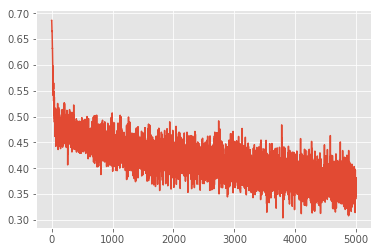

In [6]:
inputDim = X_train_scaled.shape[1]
outputDim = y_train.shape[1]
mlp = MLP()
mlp.buildModel(neurons=[30,20], activations=['elu', 'elu'], 
               dropout=[0.7,0.7], inputDim=inputDim, outputDim=outputDim)

%matplotlib inline
results = mlp.train(X=X_train_scaled, y=y_train, X_test=X_test_scaled, y_test=y_test, 
                    num_epochs=5000, lr=0.0003, seed=seed)

## Predict on each test set

Predict on each scaled test set and obtain average accuracy

In [7]:
accuracy_list = list()

for ts in test_split_list:
    temp_scaled = scale_X.transform(ts[0])
    res = mlp.predict(X=temp_scaled)
    accuracy = (res["y_pred_cls"][:,0] == ts[1][:,0]).sum() / float(len(res["y_pred_cls"]))
    accuracy_list.append(accuracy)
    
print("The average accuracy on imputed test sets: {}".format(np.mean(accuracy_list)))

The average accuracy on imputed test sets: 0.8


In [8]:
accuracy_list

[0.8, 0.8, 0.8, 0.8, 0.8]